In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [2]:
health_care = pd.read_csv("cleaned_data_1.csv")
health_care_df = pd.DataFrame(health_care)
health_care_df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
health_care_df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [4]:
health_care_df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.230326,0.097456,0.054012,105.392873,28.161448,0.048728
std,22.014411,0.296607,0.226063,44.270397,6.242514,0.215320
min,0.000000,0.000000,0.000000,55.120000,12.000000,0.000000
25%,26.000000,0.000000,0.000000,77.930000,24.100000,0.000000
50%,43.230326,0.000000,0.000000,91.820000,28.100000,0.000000
75%,60.000000,0.000000,0.000000,112.325000,31.800000,0.000000
max,82.000000,1.000000,1.000000,271.740000,45.000000,1.000000


In [5]:
health_care_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [6]:
health_care_df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

# <span style="color:Green">No Null Data</span>

In [7]:
health_care_df.duplicated().sum()

np.int64(174)

# <span style="color:Cyan">Visualization For Age Distribution</span>

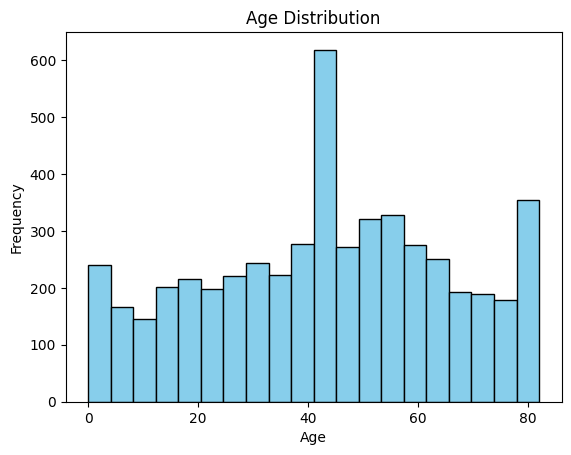

In [8]:
plt.hist(health_care_df['age'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

# <span style="color:Cyan">Visualization For Work Types</span>

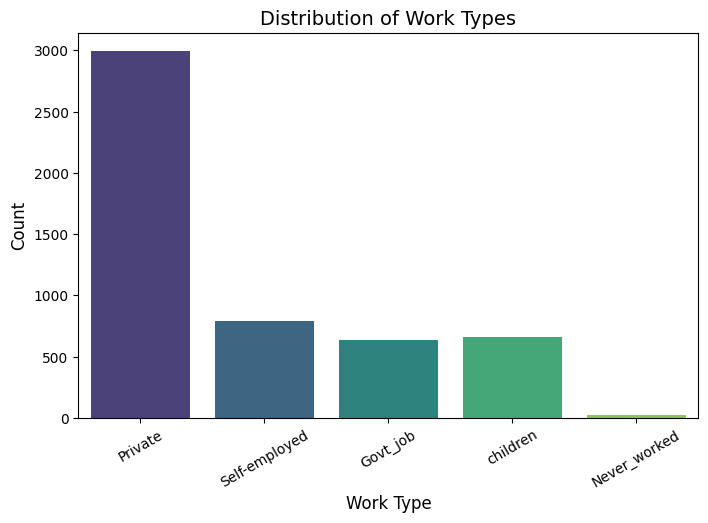

In [9]:
plt.figure(figsize=(8,5))


sns.countplot(x='work_type', data=health_care_df, palette='viridis', hue='work_type', legend=False)

plt.title("Distribution of Work Types", fontsize=14)
plt.xlabel("Work Type", fontsize=12)
plt.ylabel("Count", fontsize=12)

plt.xticks(rotation=30)

plt.show()

# <span style="color:Cyan">Visualization For Average Glucose Level</span>

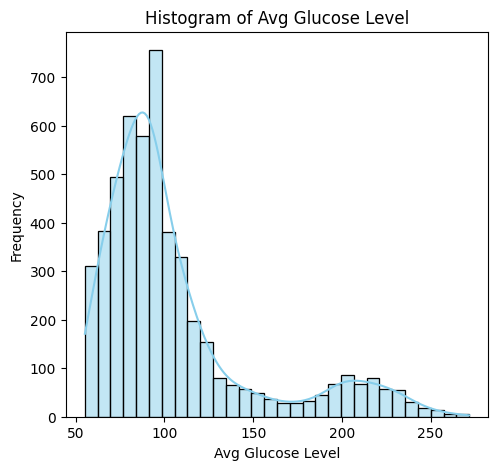

<Figure size 600x500 with 0 Axes>

In [10]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(health_care_df['avg_glucose_level'], bins=30, kde=True, color='skyblue')
plt.title("Histogram of Avg Glucose Level")
plt.xlabel("Avg Glucose Level")
plt.ylabel("Frequency")
plt.figure(figsize=(6,5))
plt.tight_layout()
plt.show()


# <span style="color:Cyan">Visualization For BMI</span>

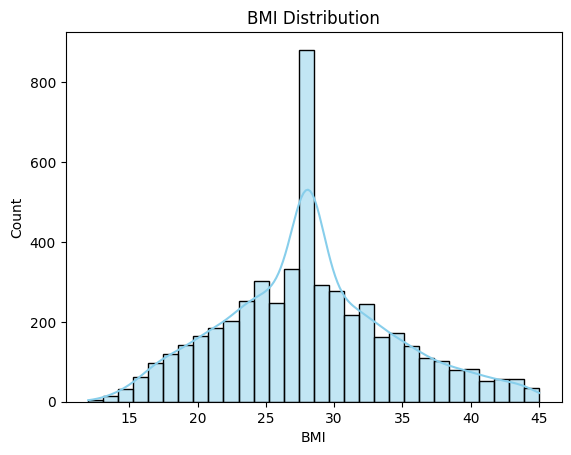

In [11]:
sns.histplot(health_care_df['bmi'], bins=30, kde=True, color='skyblue')
plt.title("BMI Distribution")
plt.xlabel("BMI")
plt.ylabel("Count")
plt.show()


# <span style="color:Cyan">Visualization For Age Smoking Status Pie Chart</span>

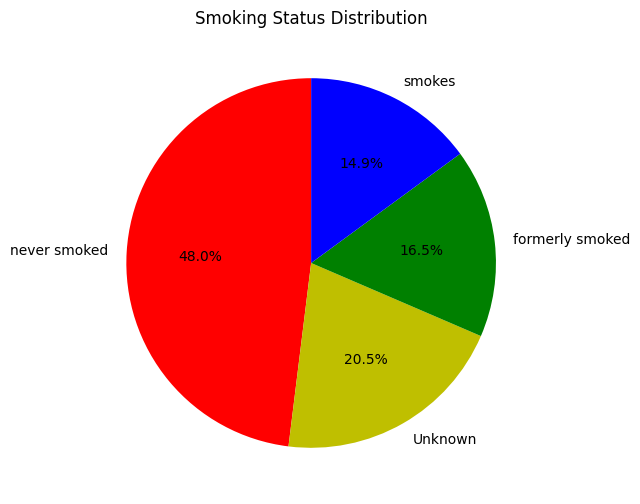

In [12]:
health_care_df['smoking_status'].value_counts().plot.pie(autopct='%1.1f%%', colors=["r","y","g","b"], startangle=90, figsize=(6,6))
plt.title("Smoking Status Distribution")
plt.ylabel("")  
plt.show()

# <span style="color:red">Feature Engineering</span>

In [13]:
def classify_age(age):
    if age < 40:
        return  "Young"
    elif age < 60:
        return  "Middle-aged"
    else:
        return  "Elderly"
    
health_care_df['age_category'] = health_care_df['age'].apply(classify_age)

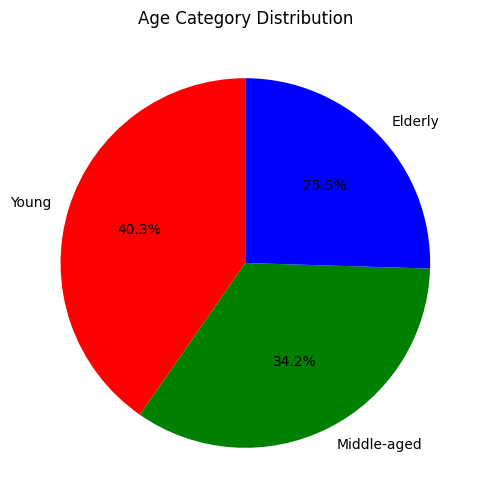

In [14]:
plt.figure(figsize=(6, 6))
colors = ["r", "g", "b"]
health_care_df["age_category"].value_counts().plot.pie(autopct='%1.1f%%', colors=colors, startangle=90)

plt.title("Age Category Distribution")
plt.ylabel("")  
plt.show()

In [15]:
def classify_bmi(bmi):
    if bmi < 18.5:
        return "Underweight"
    elif bmi < 25:
        return " Normal Weight"
    elif bmi < 30:
        return  "Overweight"
    else:
        return "Obese" 

health_care_df['bmi_category'] = health_care_df['bmi'].apply(classify_bmi)


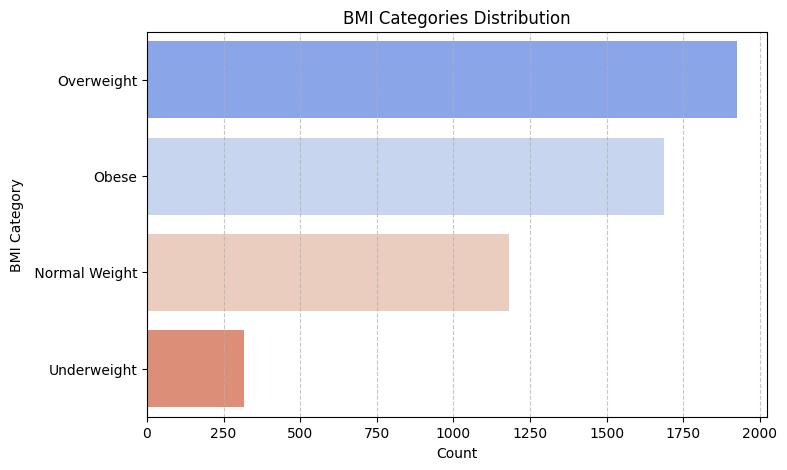

In [16]:
plt.figure(figsize=(8, 5))
sns.barplot(
    x=health_care_df["bmi_category"].value_counts().values, 
    y=health_care_df["bmi_category"].value_counts().index, 
    hue=health_care_df["bmi_category"].value_counts().index, 
     
    palette="coolwarm"
)

plt.xlabel("Count")
plt.ylabel("BMI Category")
plt.title("BMI Categories Distribution")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [17]:
def categorize_glucose(value):
    if value < 70:
        return  "Low"
    elif 70 <= value <= 99:
        return "Normal"
    elif 100 <= value <= 125:
        return  "Prediabetes"
    elif 126 <= value <= 199:
        return "Diabetes"
    else:
        return "Severe Diabetes"

health_care_df["glucose_category"] = health_care_df["avg_glucose_level"].apply(categorize_glucose)


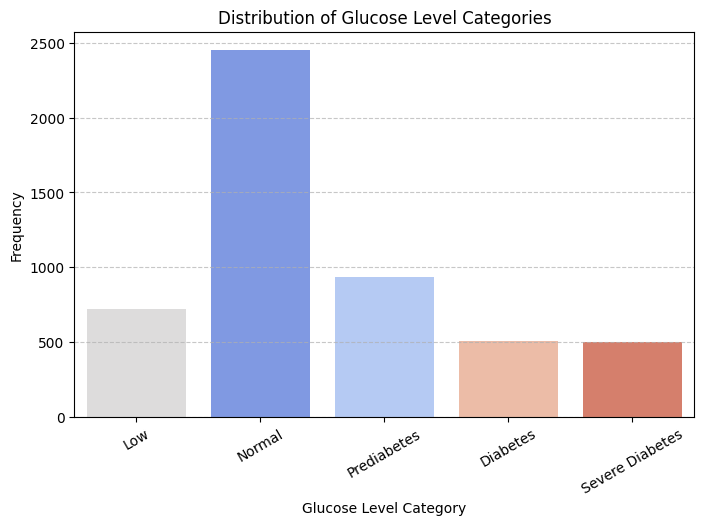

In [18]:
category_order = ["Low", "Normal", "Prediabetes", "Diabetes", "Severe Diabetes"]


category_counts = health_care_df["glucose_category"].value_counts()


category_df = category_counts.reset_index()
category_df.columns = ["glucose_category", "count"]


plt.figure(figsize=(8, 5))
sns.barplot(data=category_df, x="glucose_category", y="count", hue="glucose_category", palette="coolwarm", order=category_order, legend=False)


plt.xlabel("Glucose Level Category")
plt.ylabel("Frequency")
plt.title("Distribution of Glucose Level Categories")
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


C:\Users\mazen\AppData\Local\Temp\ipykernel_14600\1088099216.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='age', x='stroke', data=health_care_df, palette='coolwarm')


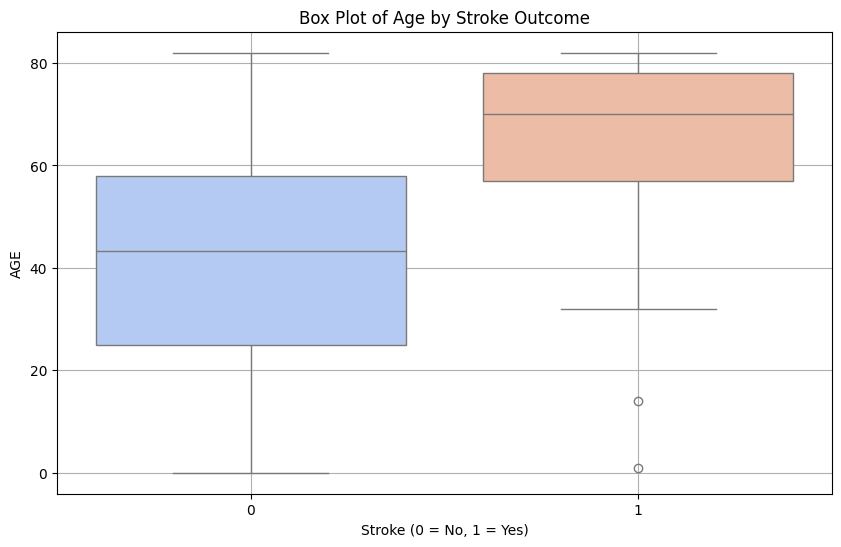

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(y='age', x='stroke', data=health_care_df, palette='coolwarm')
plt.title('Box Plot of Age by Stroke Outcome')
plt.xlabel('Stroke (0 = No, 1 = Yes)')
plt.ylabel('AGE')
plt.grid(True)
plt.show()


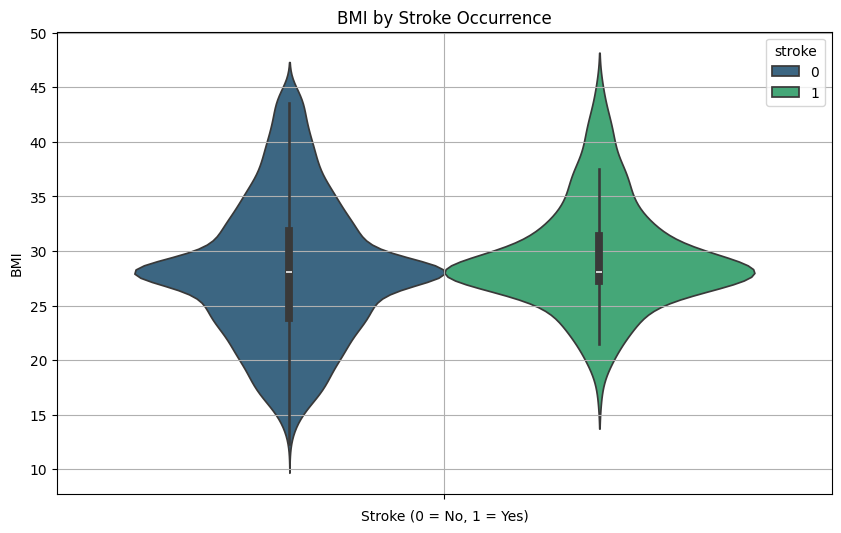

In [20]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=health_care_df,hue='stroke',y='bmi',palette='viridis')
plt.title('BMI by Stroke Occurrence')
plt.xlabel('Stroke (0 = No, 1 = Yes)')
plt.ylabel('BMI')
plt.grid(True)
plt.show()

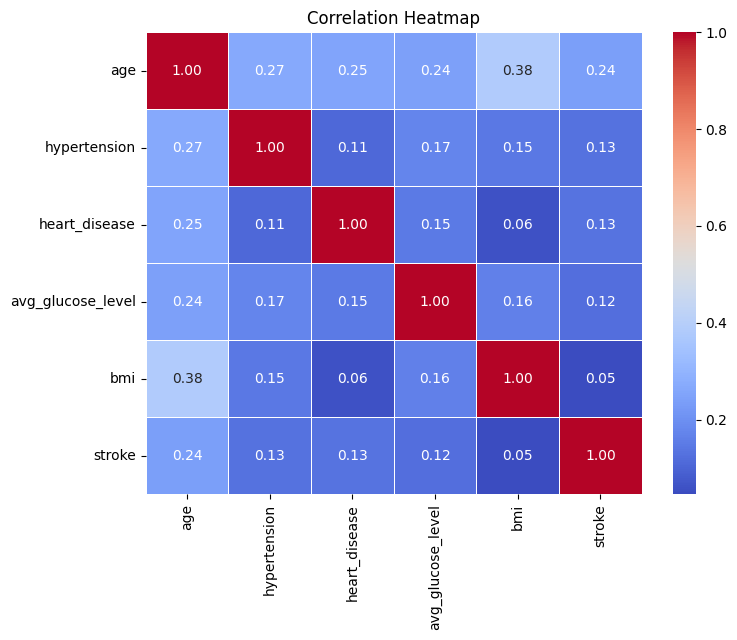

In [21]:
numeric_cols = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']
corr_matrix = health_care_df[numeric_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# <span style="color:red">Encoding</span>

In [22]:
health_care_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
 11  age_category       5110 non-null   object 
 12  bmi_category       5110 non-null   object 
 13  glucose_category   5110 non-null   object 
dtypes: float64(3), int64(3), object(8)
memory usage: 559.0+ KB


In [23]:
health_care_df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
age_category          object
bmi_category          object
glucose_category      object
dtype: object

In [24]:
health_care_df['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [25]:
map_gender = {'Male' : 0b00 ,'Female': 0b01 ,'Other': 0b10}
health_care_df['gender'] = health_care_df['gender'].map(map_gender)

In [26]:
health_care_df['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [27]:
map_work_type = {'Private' : 0, 'Self-employed' : 1 , 'Govt_job' : 2 , 'children' : 3 , 'Never_worked' : 4}
health_care_df['work_type'] = health_care_df['work_type'].map(map_work_type)

In [28]:
health_care_df['ever_married'].unique()

array(['Yes', 'No'], dtype=object)

In [29]:
map_ever_married = {'Yes': 1,'No' : 0 }
health_care_df['ever_married'] =health_care_df['ever_married'].map(map_ever_married)

In [30]:
health_care_df['Residence_type'].unique()

array(['Urban', 'Rural'], dtype=object)

In [31]:
map_residence_type = {'Urban' : 0 , 'Rural' : 1}
health_care_df['Residence_type'] =health_care_df['Residence_type'].map(map_residence_type)

In [32]:
health_care_df['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [33]:
map_smoking_status = {'formerly smoked' : 0 , 'never smoked' : 1 , 'smokes' : 2,'Unknown':-1}
health_care_df['smoking_status'] =health_care_df['smoking_status'].map(map_smoking_status)

In [34]:
health_care_df['age_category'].unique()

array(['Elderly', 'Middle-aged', 'Young'], dtype=object)

In [35]:
map_age_category={"Young":0,'Middle-aged':1,'Elderly':2}
health_care_df['age_category']=health_care_df['age_category'].map(map_age_category)

In [36]:
health_care_df['glucose_category'].unique()

array(['Severe Diabetes', 'Prediabetes', 'Diabetes', 'Normal', 'Low'],
      dtype=object)

In [37]:
map_glucose_category={'Low':0,'Normal':1,'Diabetes':2, 'Prediabetes':3,'Severe Diabetes':4}
health_care_df['glucose_category']=health_care_df['glucose_category'].map(map_glucose_category)

In [38]:
health_care_df['bmi_category'].unique()

array(['Obese', 'Overweight', ' Normal Weight', 'Underweight'],
      dtype=object)

In [39]:
map_bmi_category={'Obese':3, 'Overweight':2, ' Normal Weight':1, 'Underweight':0}
health_care_df['bmi_category']=health_care_df['bmi_category'].map(map_bmi_category)

In [40]:
health_care_df.dtypes

gender                 int64
age                  float64
hypertension           int64
heart_disease          int64
ever_married           int64
work_type              int64
Residence_type         int64
avg_glucose_level    float64
bmi                  float64
smoking_status         int64
stroke                 int64
age_category           int64
bmi_category           int64
glucose_category       int64
dtype: object

In [41]:
health_care_df.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_category,bmi_category,glucose_category
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,0.586301,43.230326,0.097456,0.054012,0.656164,0.811546,0.491977,105.392873,28.161448,0.574168,0.048728,0.851468,1.975147,1.616047
std,0.492941,22.014411,0.296607,0.226063,0.475034,1.110240,0.499985,44.270397,6.242514,0.976269,0.215320,0.797611,0.898863,1.211826
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,12.000000,-1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,77.930000,24.100000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,1.000000,43.230326,0.000000,0.000000,1.000000,0.000000,0.000000,91.820000,28.100000,1.000000,0.000000,1.000000,2.000000,1.000000
75%,1.000000,60.000000,0.000000,0.000000,1.000000,2.000000,1.000000,112.325000,31.800000,1.000000,0.000000,2.000000,3.000000,3.000000
max,2.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,45.000000,2.000000,1.000000,2.000000,3.000000,4.000000


# <span style="color:Blue">Heat Map After Encoding</span>

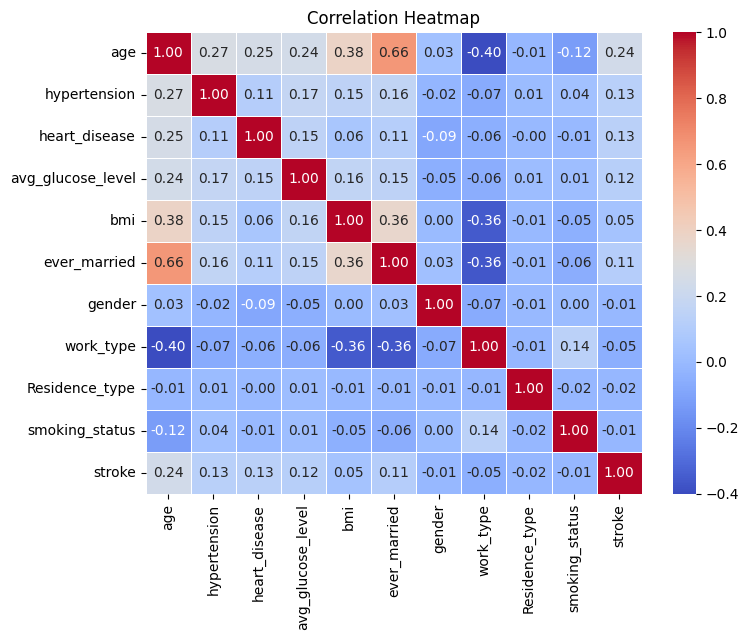

In [42]:
numeric_cols = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 
                'bmi', 'ever_married','gender','work_type','Residence_type',
                'smoking_status','stroke']
corr_matrix = health_care_df[numeric_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# <span style="color:red">Normalization</span>

In [43]:
scaler = MinMaxScaler()
health_care_df[['age', 'avg_glucose_level', 'bmi']] = scaler.fit_transform(health_care_df[['age', 'avg_glucose_level', 'bmi']])

# <span style="color:Orange">Age , Avg_glucose_level , Bmi is normalized from 0 -> 1</span>

In [44]:
health_care_df.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_category,bmi_category,glucose_category
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,0.586301,0.527199,0.097456,0.054012,0.656164,0.811546,0.491977,0.232079,0.489741,0.574168,0.048728,0.851468,1.975147,1.616047
std,0.492941,0.268468,0.296607,0.226063,0.475034,1.110240,0.499985,0.204369,0.189167,0.976269,0.215320,0.797611,0.898863,1.211826
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.317073,0.000000,0.000000,0.000000,0.000000,0.000000,0.105300,0.366667,0.000000,0.000000,0.000000,1.000000,1.000000
50%,1.000000,0.527199,0.000000,0.000000,1.000000,0.000000,0.000000,0.169421,0.487879,1.000000,0.000000,1.000000,2.000000,1.000000
75%,1.000000,0.731707,0.000000,0.000000,1.000000,2.000000,1.000000,0.264080,0.600000,1.000000,0.000000,2.000000,3.000000,3.000000
max,2.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,3.000000,4.000000


# <span style="color:Green">Save The New Data</span>

In [45]:
health_care_df.to_csv("cleaned_data_2.csv", index=False)